In [1]:
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
import numpy as np
import pandas as p
from scipy import constants

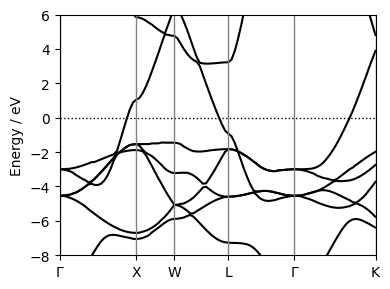

In [2]:
tree = ET.parse("bandstructure.xml")
root = tree.getroot()

k_points = [float(pt.attrib["distance"]) for pt in root.find("band").iter("point")]

bands = [
    [
        float(pt.attrib["eval"])
        * constants.physical_constants["Hartree energy in eV"][0]
        for pt in elm.iter("point")
    ]
    for elm in root.iter("band")
]

labels_k = [float(elm.attrib["distance"]) for elm in root.iter("vertex")]
labels = [elm.attrib["label"].replace("GAMMA", "Γ") for elm in root.iter("vertex")]

fig, ax = plt.subplots(figsize=(4, 3), dpi=100)
for band in bands:
    ax.plot(k_points, band, color="black")

ax.axhline(0, color="black", ls=":", lw=1)
for k in labels_k:
    ax.axvline(k, color="gray", lw=1)

ax.set(
    xlim=(k_points[0], k_points[-1]),
    ylim=(-8, 6),
    ylabel="Energy / eV",
    xticks=labels_k,
    xticklabels=labels,
)

fig.tight_layout()